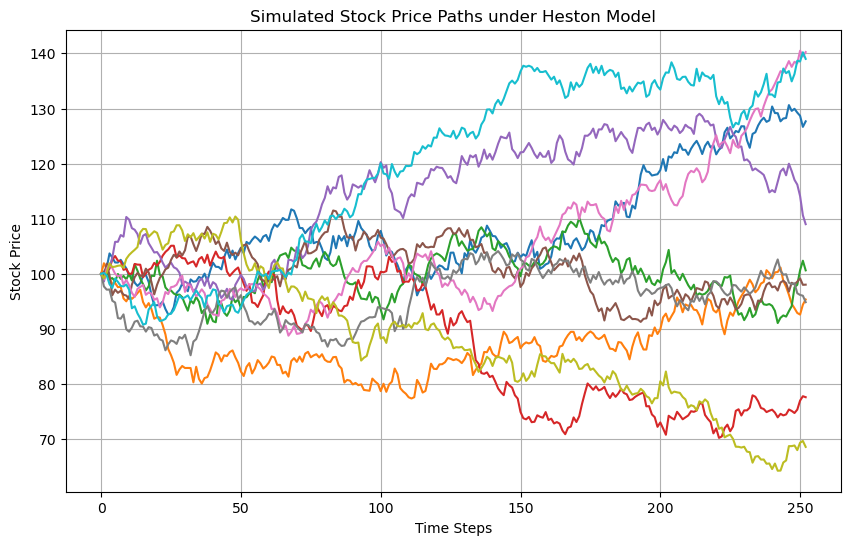

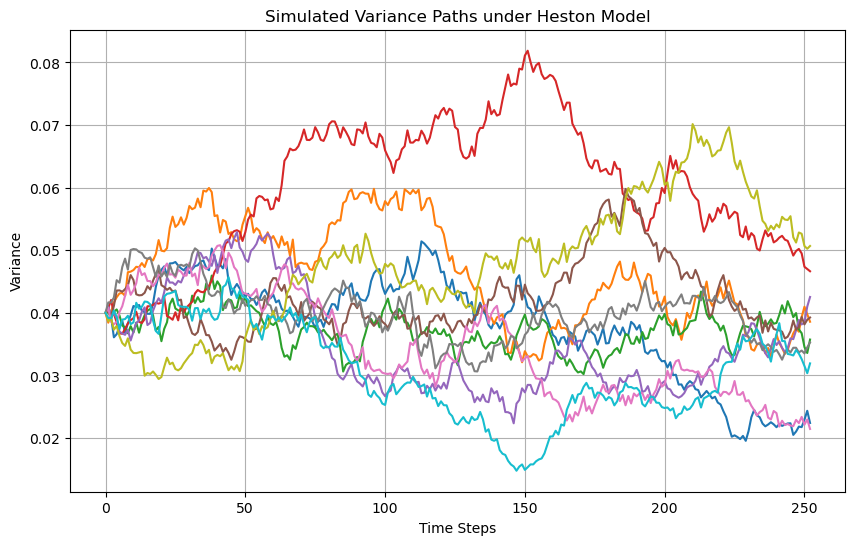

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Heston model parameters
S0 = 100          # Initial stock price
v0 = 0.04         # Initial variance (volatility^2)
mu = 0.05         # Drift rate
kappa = 2.0       # Rate of mean reversion of variance
theta = 0.04      # Long-term variance
sigma_v = 0.1     # Volatility of volatility
rho = -0.7        # Correlation between the Brownian motions of the stock and volatility
T = 1.0           # Time horizon (in years)
n_steps = 252     # Number of time steps (daily simulation for 1 year)
n_simulations = 1000  # Number of simulation paths

# Time increments
dt = T / n_steps

# Arrays to store the simulated stock prices and variances
S = np.zeros((n_steps + 1, n_simulations))
v = np.zeros((n_steps + 1, n_simulations))

# Initial conditions
S[0, :] = S0
v[0, :] = v0

# Generate two correlated Brownian motions
Z1 = np.random.normal(0, 1, (n_steps, n_simulations))
Z2 = np.random.normal(0, 1, (n_steps, n_simulations))
W1 = Z1 * np.sqrt(dt)
W2 = (rho * Z1 + np.sqrt(1 - rho**2) * Z2) * np.sqrt(dt)

# Simulate the paths
for t in range(1, n_steps + 1):
    v[t, :] = np.maximum(v[t - 1, :] + kappa * (theta - v[t - 1, :]) * dt + sigma_v * np.sqrt(v[t - 1, :]) * W2[t - 1, :], 0)
    S[t, :] = S[t - 1, :] * np.exp((mu - 0.5 * v[t - 1, :]) * dt + np.sqrt(v[t - 1, :]) * W1[t - 1, :])

# Plot a few simulation paths
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])  # Plot the first 10 simulated paths
plt.title('Simulated Stock Price Paths under Heston Model')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Plot the variance paths
plt.figure(figsize=(10, 6))
plt.plot(v[:, :10])  # Plot the first 10 simulated variance paths
plt.title('Simulated Variance Paths under Heston Model')
plt.xlabel('Time Steps')
plt.ylabel('Variance')
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # for retrieving historical stock data


In [4]:
# Retrieve 1-year historical data for NVDA
nvda_data = yf.download('NVDA', period='1y')

# Set initial stock price to the last closing price
S0 = nvda_data['Close'][-1]

# Calculate historical volatility (as a proxy for initial variance)
v0 = nvda_data['Close'].pct_change().rolling(window=30).std()[-1] ** 2


[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_18224\4197960740.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = nvda_data['Close'][-1]
C:\Users\HP\AppData\Local\Temp\ipykernel_18224\4197960740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v0 = nvda_data['Close'].pct_change().rolling(window=30).std()[-1] ** 2


In [6]:
# Heston model parameters (calibrated for NVDA)
mu = 0.10  # Drift rate (assuming 10% annual return)
kappa = 2.5  # Rate of mean reversion of variance
theta = v0 * 1.2  # Long-term variance (slightly higher than initial)
sigma_v = 0.15  # Volatility of volatility
rho = -0.75  # Correlation between stock and volatility Brownian motions
T = 1.0  # Time horizon (in years)
n_steps = 252  # Number of time steps (daily simulation for 1 year)
n_simulations = 1000  # Number of simulation paths


In [8]:
# Time increments
dt = T / n_steps

# Arrays to store simulated stock prices and variances
S = np.zeros((n_steps + 1, n_simulations))
v = np.zeros((n_steps + 1, n_simulations))

# Initial conditions
S[0, :] = S0
v[0, :] = v0

# Generate two correlated Brownian motions
Z1 = np.random.normal(0, 1, (n_steps, n_simulations))
Z2 = np.random.normal(0, 1, (n_steps, n_simulations))
W1 = Z1 * np.sqrt(dt)
W2 = (rho * Z1 + np.sqrt(1 - rho**2) * Z2) * np.sqrt(dt)

# Simulate paths
for t in range(1, n_steps + 1):
    v[t, :] = np.maximum(v[t - 1, :] + kappa * (theta - v[t - 1, :]) * dt + sigma_v * np.sqrt(v[t - 1, :]) * W2[t - 1, :], 0)
    S[t, :] = S[t - 1, :] * np.exp((mu - 0.5 * v[t - 1, :]) * dt + np.sqrt(v[t - 1, :]) * W1[t - 1, :])


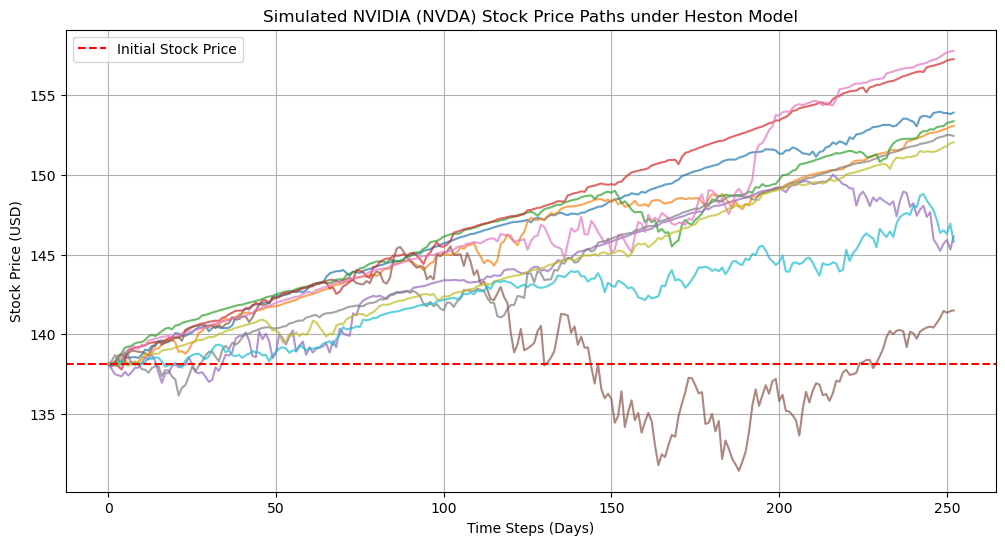

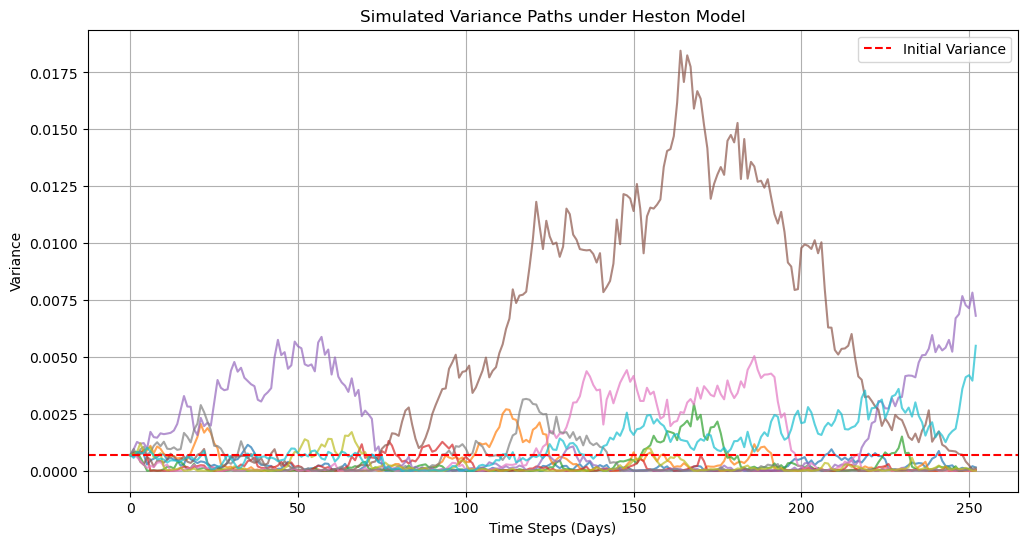

In [10]:
# Plot a few simulation paths
plt.figure(figsize=(12, 6))
plt.plot(S[:, :10], alpha=0.7)  # Plot the first 10 simulated paths
plt.axhline(y=S0, color='r', linestyle='--', label='Initial Stock Price')
plt.title('Simulated NVIDIA (NVDA) Stock Price Paths under Heston Model')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the variance paths
plt.figure(figsize=(12, 6))
plt.plot(v[:, :10], alpha=0.7)  # Plot the first 10 simulated variance paths
plt.axhline(y=v0, color='r', linestyle='--', label='Initial Variance')
plt.title('Simulated Variance Paths under Heston Model')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Retrieve 1-year historical data for TSLA
tsla_data = yf.download('TSLA', period='1y')

# Set initial stock price to the last closing price
S0 = tsla_data['Close'][-1]

# Calculate historical volatility (as a proxy for initial variance)
v0 = tsla_data['Close'].pct_change().rolling(window=30).std()[-1] ** 2


[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_18224\2926314480.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = tsla_data['Close'][-1]
C:\Users\HP\AppData\Local\Temp\ipykernel_18224\2926314480.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v0 = tsla_data['Close'].pct_change().rolling(window=30).std()[-1] ** 2


In [14]:
# Heston model parameters (calibrated for TSLA)
mu = 0.18  # Drift rate (assuming 18% annual return)
kappa = 2.5  # Rate of mean reversion of variance
theta = v0 * 1.8  # Long-term variance (increased to reflect TSLA's higher volatility)
sigma_v = 0.18  # Volatility of volatility (slightly increased)
rho = -0.75  # Correlation between stock and volatility Brownian motions
T = 1.0  # Time horizon (in years)
n_steps = 252  # Number of time steps (daily simulation for 1 year)
n_simulations = 1000  # Number of simulation paths


In [16]:
# Time increments
dt = T / n_steps

# Arrays to store simulated stock prices and variances
S = np.zeros((n_steps + 1, n_simulations))
v = np.zeros((n_steps + 1, n_simulations))

# Initial conditions
S[0, :] = S0
v[0, :] = v0

# Generate two correlated Brownian motions
Z1 = np.random.normal(0, 1, (n_steps, n_simulations))
Z2 = np.random.normal(0, 1, (n_steps, n_simulations))
W1 = Z1 * np.sqrt(dt)
W2 = (rho * Z1 + np.sqrt(1 - rho**2) * Z2) * np.sqrt(dt)

# Simulate paths
for t in range(1, n_steps + 1):
    v[t, :] = np.maximum(v[t - 1, :] + kappa * (theta - v[t - 1, :]) * dt + sigma_v * np.sqrt(v[t - 1, :]) * W2[t - 1, :], 0)
    S[t, :] = S[t - 1, :] * np.exp((mu - 0.5 * v[t - 1, :]) * dt + np.sqrt(v[t - 1, :]) * W1[t - 1, :])


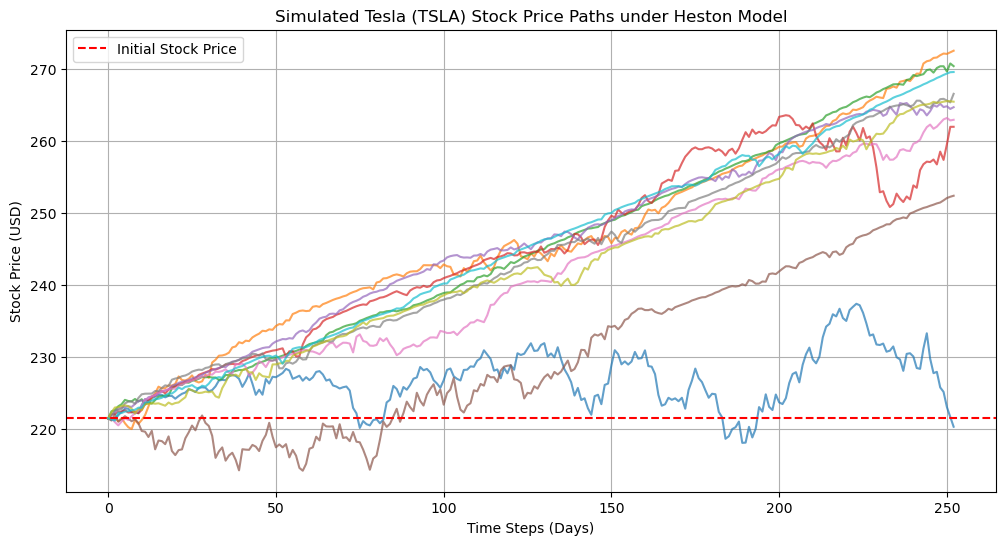

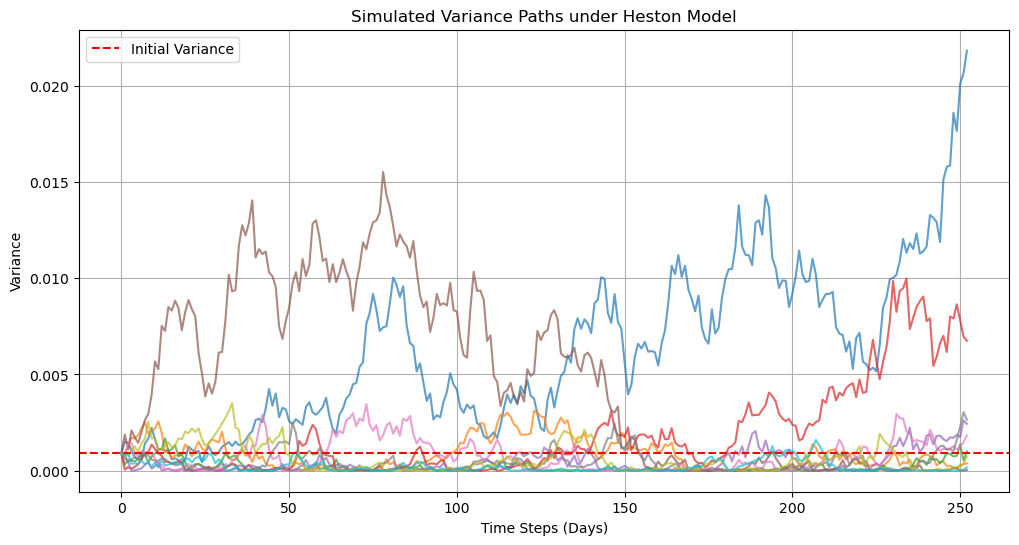

In [18]:
# Plot a few simulation paths
plt.figure(figsize=(12, 6))
plt.plot(S[:, :10], alpha=0.7)  # Plot the first 10 simulated paths
plt.axhline(y=S0, color='r', linestyle='--', label='Initial Stock Price')
plt.title('Simulated Tesla (TSLA) Stock Price Paths under Heston Model')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the variance paths
plt.figure(figsize=(12, 6))
plt.plot(v[:, :10], alpha=0.7)  # Plot the first 10 simulated variance paths
plt.axhline(y=v0, color='r', linestyle='--', label='Initial Variance')
plt.title('Simulated Variance Paths under Heston Model')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()
